<a href="https://colab.research.google.com/github/NataliaCichonska/PUT-IT/blob/main/stochastyczne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importowanie bibliotek i definiowanie funkcji


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
from scipy.stats import norm
import random

def wykresy_dystrybuanty(szum_bialy, liczba_slupkow=5, szerokosc_slupka=0.90, fg=0):
    '''
    Funkcja generuje wykresy dystrybuanty dla szumu białego.
    :param szum_bialy: wygenerowany wcześniej szum biały
    :param liczba_slupkow: liczba słupków, domyślnie 10
    :param szerokosc_slupka: szerokość słupka, w przedziale 0.0 - 1.0 (domyślnie 0.9)
    :return: brak
    '''

    # Obliczanie dystrybuanty
    cdf_values = uniform.cdf(szum_bialy, loc=ZAKRES[0], scale=ZAKRES[1] - ZAKRES[0])

    # Obliczanie kroku dla słupków X
    ilosc_probek = len(szum_bialy)
    krok = int(ilosc_probek / liczba_slupkow)

    # Sortowanie danych
    sorted_data = np.sort(szum_bialy)
    sorted_cdf = np.sort(cdf_values)

    # Obliczanie szerokości słupków
    width = (sorted_data[krok] - sorted_data[0]) * szerokosc_slupka  # 80% szerokości między pierwszym a drugim słupkiem

    # Tworzenie wykresu słupkowego dystrybuanty
    for i in range(0, LICZBA_PROBEK, krok):
        plt.bar(sorted_data[i], sorted_cdf[i], width=width, color='r', alpha=0.5)

    # Tworzenie wykresu liniowego dla dystrybuanty
    plt.plot(sorted_data, sorted_cdf, 'g', label='Dystrybuanta generowana')

    if(fg!=0):
      plt.title('Dystrybuana gęstości prawdopodobieństwa - fg= '+fg+"Hz")
    else:
      plt.title('Histogram gęstości prawdopodobieństwa')
    plt.title('Dystrybuanta Szumu białego')
    plt.xlabel('Wartość')
    plt.ylabel('CDF')
    plt.legend()
    plt.grid(True)
    plt.show()

def wykres_gestosci_prawdopodobienstwa(szum_bialy, oczekiwana_czestosc_wystepowania=0, fg=0):
  plt.figure(figsize=(10, 5))
  plt.hist(szum_bialy, bins=25, density=True, rwidth=0.98, color='g', edgecolor='black', alpha=0.7)
  if(oczekiwana_czestosc_wystepowania!=0):
    plt.axhline(oczekiwana_czestosc_wystepowania, color='r', linestyle='--')
  if(fg!=0):
    plt.title('Histogram gęstości prawdopodobieństwa - fg= '+fg+"Hz")
  else:
    plt.title('Histogram gęstości prawdopodobieństwa')
  plt.xlabel('Wartość')
  plt.ylabel('Częstość występowania [%]')
  plt.grid(True)
  plt.show()

def wykres_czasowy_szumu_bialego(szum_bialy, czas_trwania, liczba_probek, fg=0):
  czas = np.linspace(0, czas_trwania, liczba_probek)
  plt.figure(figsize=(20, 10))
  plt.plot(czas, szum_bialy)
  if(fg!=0):
    plt.title('Wykres czasowy po filtracji - fg= '+fg+"Hz")
  else:
    plt.title('Wykres czasowy szumu białego o rozkładzie równomiernym')
  plt.xlabel('Czas [s]')
  plt.ylabel('Amplituda')
  plt.grid(True)
  plt.show()

def avg(lst):
    return sum(lst) / len(lst)

def dystrybuanta_slupkowa(lista_probek, zakres, ilosc_slupkow=20, fg=0):
    '''
    Funkcja generuje wykres dystrybuanty słupkowej dla szumu białego.
    :param ilosc_slupkow: liczba słupków, domyślnie 20
    '''
    probki = np.sort(lista_probek)

    # Obliczanie dystrybuanty
    cdf_values = uniform.cdf(probki, loc=zakres[0], scale=zakres[1] - zakres[0])
    sorted_cdf = np.sort(cdf_values)

    krok = int(len(probki) / ilosc_slupkow)

    # Obliczanie wartości dystrybuanty w środkach słupków
    wartosci_dystrybuanty = [avg(sorted_cdf[i:i+krok]) for i in range(0, len(sorted_cdf)-krok, krok)]
    if len(wartosci_dystrybuanty) < ilosc_slupkow:
        wartosci_dystrybuanty.append(0)
    else:
        wartosci_dystrybuanty[-1] = 0  # Ustawienie ostatniej wartości na 1
    wartosci_dystrybuanty[0]=0
    # Tworzenie wykresu słupkowego dystrybuanty
    plt.bar(np.linspace(zakres[0], zakres[1], ilosc_slupkow), wartosci_dystrybuanty, width=(zakres[1] - zakres[0]) / ilosc_slupkow, color='g', alpha=0.7, label='Dystrybuanta słupkowa')

    # Dodanie referencyjnej, kropkowanej linii dla idealnej dystrybuanty dla rozkładu równomiernego
    if(fg==0):
      idealne_probki = np.linspace(zakres[0], zakres[1], 1000)
      idealna_dystrybuanta = uniform.cdf(idealne_probki, loc=zakres[0], scale=zakres[1] - zakres[0])
      plt.plot(idealne_probki, idealna_dystrybuanta, 'b--', label='Idealna dystrybuanta równomierna')

    # Tworzenie wykresu liniowego dla dystrybuanty rzeczywistej
    if(fg==0):
      sorted_data = np.sort(lista_probek)
      plt.plot(sorted_data, sorted_cdf, 'g', label='Dystrybuanta rzeczywista')

    if(fg!=0):
      plt.title('Dystrybuanta przefiltrowanego szumu białego - fg= '+fg+"Hz")
    else:
      plt.title('Dystrybuanta szumu białego (porównanie idealnej dystrybuanty do rzeczywistej)')
    plt.xlabel('Wartość')
    plt.ylabel('Dystrybuanta')
    plt.legend()
    plt.grid(True)
    plt.show()

#Kod generatora

In [2]:
class Generator:
    def __init__(self, seed=None):
        self._random_state = np.random.RandomState(seed)

    def uniform(self, low=0.0, high=1.0, size=None):
        if size is None:
            return low + (high - low) * self._random_state.random_sample()
        else:
            return low + (high - low) * self._random_state.random_sample(size)

#Badania na danych eksperymentalnych
## Wykres czasowy szumu dla 200 próbek

In [3]:
CZAS_TRWANIA = 0.02  # sekundy
CZESTOTLIWOSC_PROBKOWANIA = 10000  # Hz
CZAS_PROBKOWANIA = CZAS_TRWANIA/CZESTOTLIWOSC_PROBKOWANIA

ZAKRES = (0,5) # Liczby rzeczywiste

In [4]:
LICZBA_PROBEK = int(CZAS_TRWANIA * CZESTOTLIWOSC_PROBKOWANIA)

gen = Generator()
szum_bialy = gen.uniform(ZAKRES[0], ZAKRES[1], LICZBA_PROBEK)

Liczba próbek 200
Czas próbkowania 2e-06
Częstotliwość próbkowania 2e-06



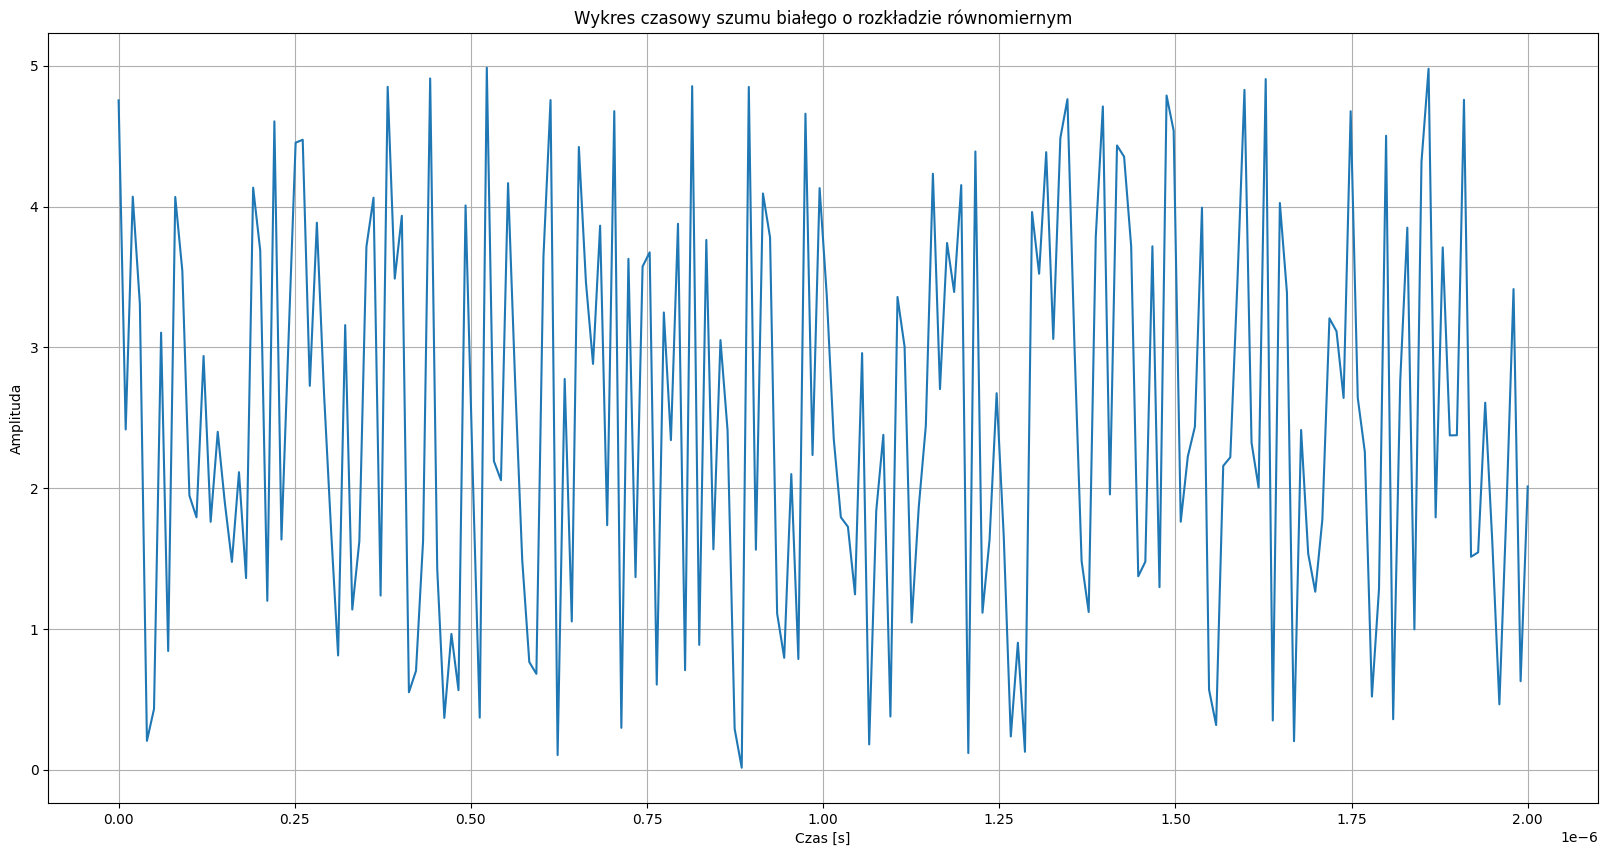

In [5]:
print(f"Liczba próbek {LICZBA_PROBEK}")
print(f"Czas próbkowania {CZAS_PROBKOWANIA}")
print(f"Częstotliwość próbkowania {CZAS_PROBKOWANIA}")
print("")
wykres_czasowy_szumu_bialego(szum_bialy, CZAS_PROBKOWANIA, LICZBA_PROBEK)

##Wykresy dla 100000 próbek

In [6]:
CZAS_TRWANIA = 10  # sekundy
CZESTOTLIWOSC_PROBKOWANIA = 10000  # Hz
CZAS_PROBKOWANIA = CZAS_TRWANIA/CZESTOTLIWOSC_PROBKOWANIA

ZAKRES = (0,5) # Liczby rzeczywiste

In [7]:
LICZBA_PROBEK = int(CZAS_TRWANIA * CZESTOTLIWOSC_PROBKOWANIA)

szum_bialy = gen.uniform(ZAKRES[0], ZAKRES[1], LICZBA_PROBEK)

Liczba próbek 100000
Czas próbkowania 0.001
Częstotliwość próbkowania 0.001



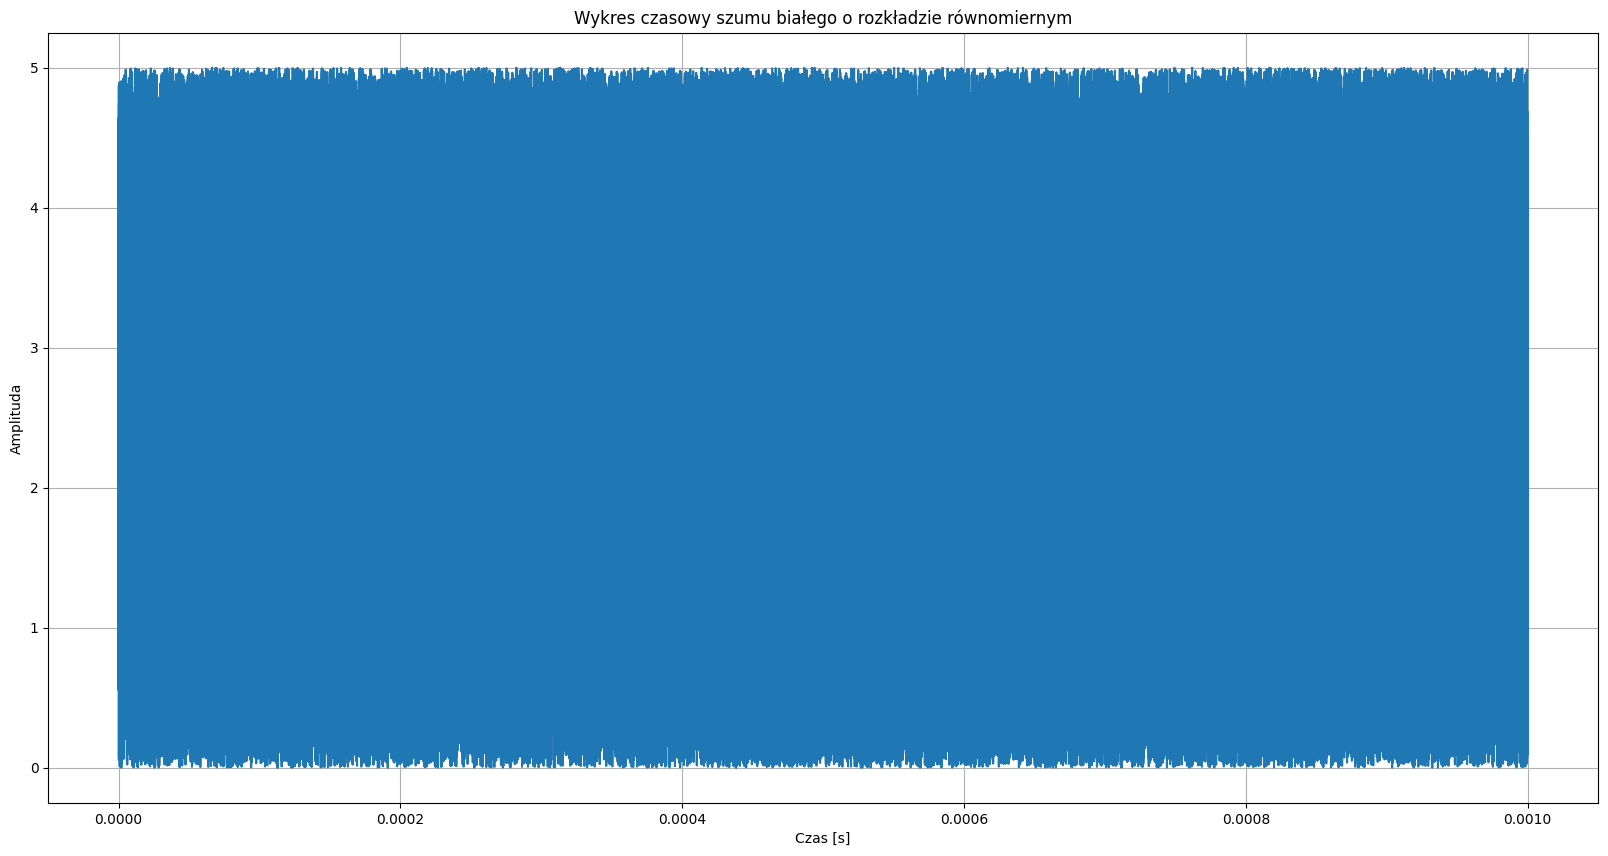

In [8]:
print(f"Liczba próbek {LICZBA_PROBEK}")
print(f"Czas próbkowania {CZAS_PROBKOWANIA}")
print(f"Częstotliwość próbkowania {CZAS_PROBKOWANIA}")
print("")
wykres_czasowy_szumu_bialego(szum_bialy, CZAS_PROBKOWANIA, LICZBA_PROBEK)

Wartość oczekiwana: 2.497898164768692
Wariancja: 2.0964405293901915



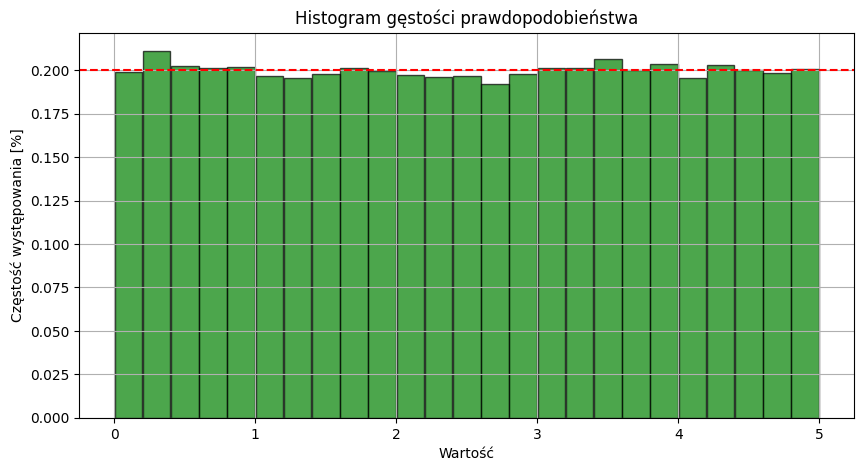

In [9]:
expected_value = sum(szum_bialy) / len(szum_bialy)
variance = sum((x - expected_value) ** 2 for x in szum_bialy) / len(szum_bialy)
print("Wartość oczekiwana:", expected_value)
print("Wariancja:", variance)
print("")

wykres_gestosci_prawdopodobienstwa(szum_bialy,0.2)

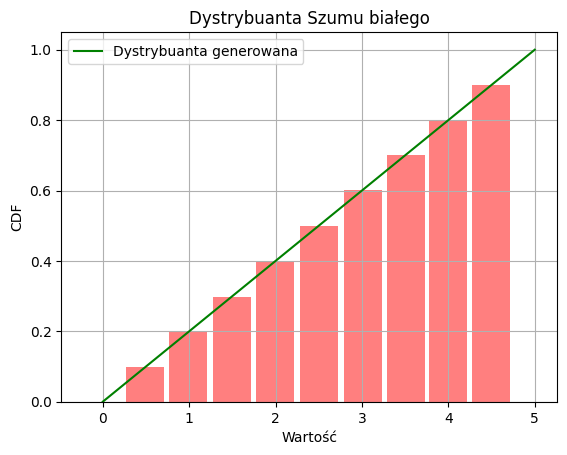

In [10]:
wykresy_dystrybuanty(szum_bialy,10)

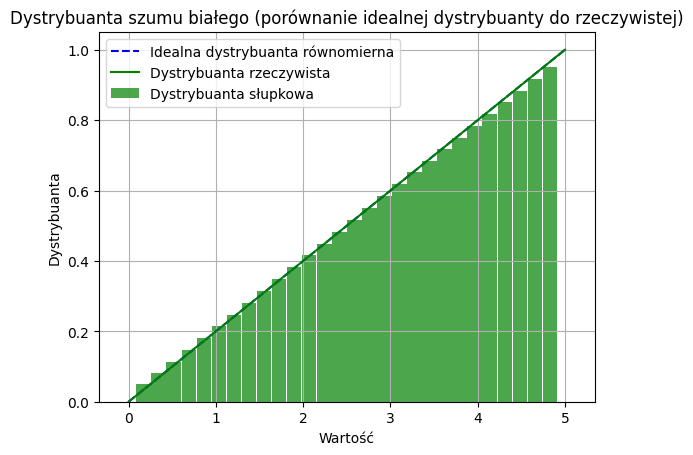

In [11]:
dystrybuanta_slupkowa(szum_bialy, ZAKRES, 30)

###Funkcja kowariancyjna

In [12]:
import pandas as pd

K = [10**2, 5*10**2, 10**3, 5*10**3, 10**4, 5*10**4, 10**5] #rozmiary próbek
m_dash = [sum(n * 10 ** (-4) for n in range(1, k + 1)) / k for k in K] #estymator średniej wartości dla danel liczby próbek
a_dash = [sum((n * 10 ** (-4))**2 - 2*(n * 10 ** (-4)*m_dash[i] + m_dash[i]**2) for n in range(1, k + 1)) / k for i, k in enumerate(K)] #estymowane wariancje próbek dla danej liczby próbek
M = [k - 100 for k in K]
K_t = ["K - liczba próbek"] + K
m_t = ["m^ - estymator średniej wartości"] + m_dash
a_t = ["a^ - estymator wariancji"] + a_dash
M.pop(0)
m_dash.pop(0)
a_dash.pop(0)
z_dash = [sum((n * 10 ** (-4) - m_dash[i]) * ((n +100) * 10 ** (-4) - m_dash[i]) for n in range(1, m + 1)) / m for i, m in enumerate(M)] #estymator kowariancji szumu białego dla danej liczby próbek
z_t = ["Z^ - estymator kowariancji szumu białego"] + ["X"] + z_dash
tabela = [K_t, m_t, a_t, z_t]

df = pd.DataFrame(tabela)
df_styled = df.style.set_table_styles([
      {'selector': 'th', 'props': [('border', '1px solid black')]}, # Styl dla nagłówków
      {'selector': 'td', 'props': [('border', '1px solid black')]}, # Styl dla komórek
  ])
df_styled

,0,1,2,3,4,5,6,7
0,K - liczba próbek,100,500.000000,1000.000000,5000.000000,10000.000000,50000.000000,100000.000000
1,m^ - estymator średniej wartości,0.005050,0.025050,0.050050,0.250050,0.500050,2.500050,5.000050
2,a^ - estymator wariancji,-0.000068,-0.001674,-0.006682,-0.166742,-0.666817,-16.667417,-66.668167
3,Z^ - estymator kowariancji szumu białego,X,0.000108,0.000650,0.019983,0.081650,2.074983,8.316650


mean: 2.49788724520274


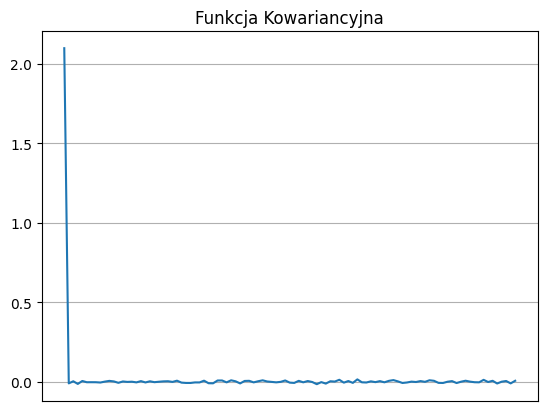

In [13]:
numtaps = 31
warmup = numtaps

Kkow=100000
K_f = Kkow - warmup
M = K_f - 100
data = []
filtered_mean = szum_bialy[warmup:].mean()
print(f"mean: {filtered_mean}")

for j in range(0, 101):
    cov = 0

    for i in range(0, K_f - j):
        covariance_product = (szum_bialy[i + warmup] - filtered_mean) * (
            szum_bialy[i + warmup + j] - filtered_mean
        )
        cov += covariance_product

    data.append(cov / M)

    mantissa = int(str(Kkow)[:2])
exponent = int(np.log10(Kkow / 10))

import seaborn as sns

sns.lineplot(data)
plt.title("Funkcja Kowariancyjna")
plt.ylabel("")
plt.xticks([])
plt.grid(True)
plt.show()

##Filtracja

100000 100000


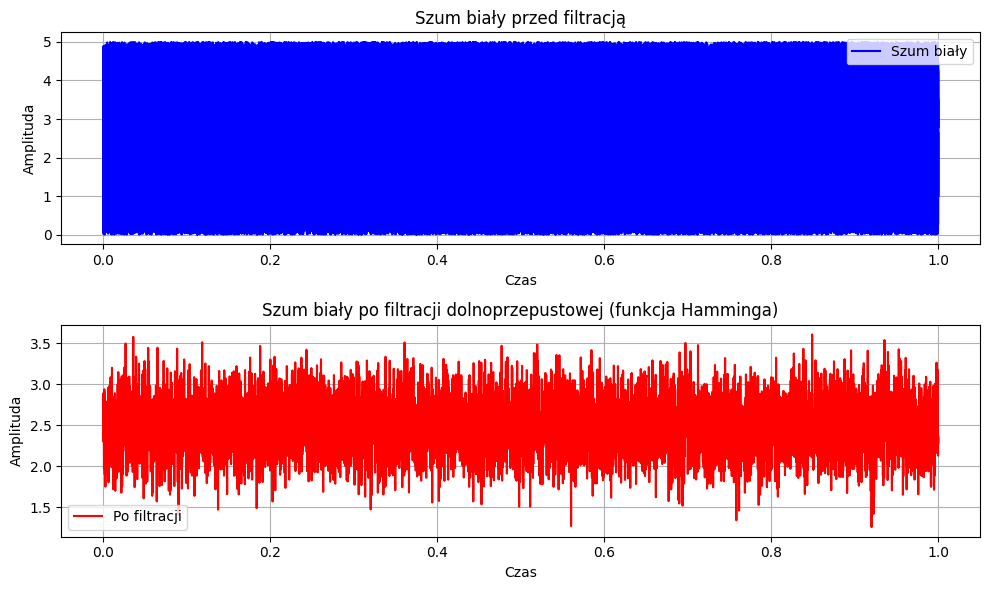

In [14]:
from scipy.signal import convolve

# Parametry filtru
window_size = 31  # Rozmiar okna dla filtra o kształcie funkcji Hamminga

# Generowanie funkcji Hamminga
hamming_window = np.hamming(window_size)

# Normalizacja funkcji Hamminga
hamming_window /= np.sum(hamming_window)

# Filtracja dolnoprzepustowa za pomocą filtru o kształcie funkcji Hamminga
filtered_noise = convolve(szum_bialy, hamming_window, mode='valid')

# Wykres przed i po filtracji
plt.figure(figsize=(10, 6))

CZAS_TRWANIA = np.linspace(0, 1, LICZBA_PROBEK)  # Czas trwania pomiaru

plt.subplot(2, 1, 1)
print(len(szum_bialy),LICZBA_PROBEK)
plt.plot(CZAS_TRWANIA, szum_bialy, color='blue', label='Szum biały')
plt.xlabel('Czas')
plt.ylabel('Amplituda')
plt.title('Szum biały przed filtracją')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(CZAS_TRWANIA[window_size-1:], filtered_noise, color='red', label='Po filtracji')
plt.xlabel('Czas')
plt.ylabel('Amplituda')
plt.title('Szum biały po filtracji dolnoprzepustowej (funkcja Hamminga)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

M: 31
Fg: 200 Hz
Fc: 0.02
Wartość oczekiwana: 2.4978374683967663
Wariancja: 0.10035781172572138


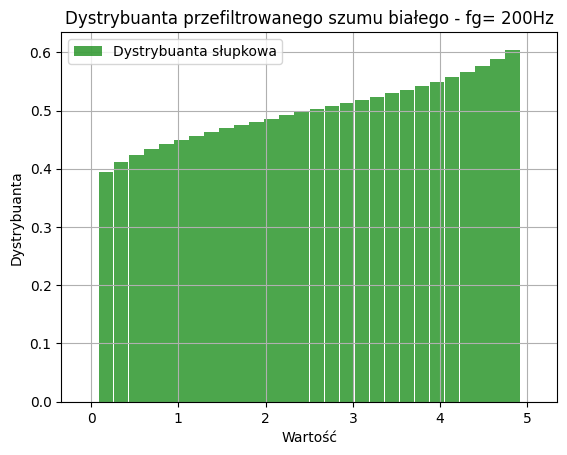

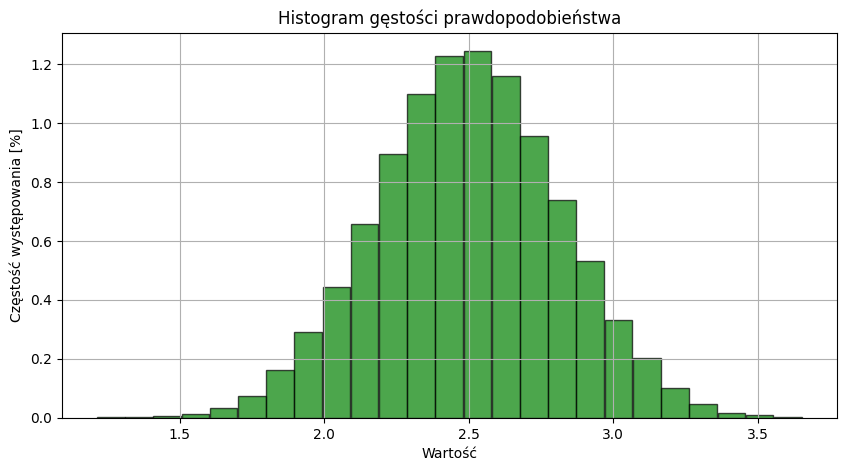

__________________________________________________________________________________________________________________
M: 31
Fg: 500 Hz
Fc: 0.05
Wartość oczekiwana: 2.49789042438588
Wariancja: 0.18509399946012572


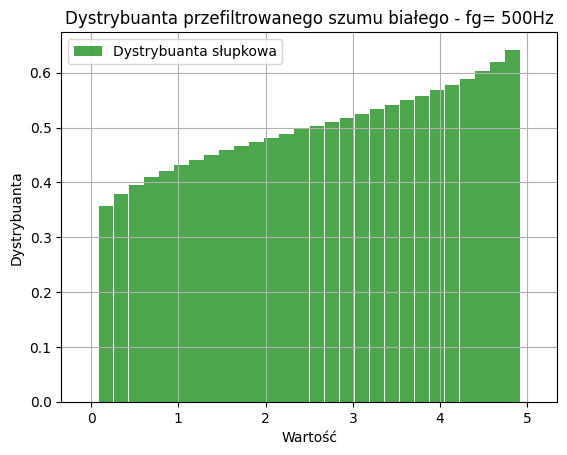

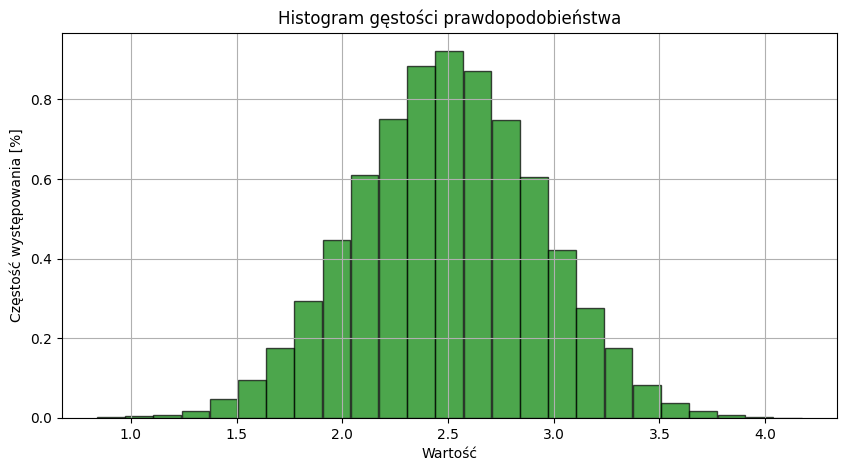

__________________________________________________________________________________________________________________
M: 31
Fg: 1000 Hz
Fc: 0.1
Wartość oczekiwana: 2.497851317526428
Wariancja: 0.404631980379495


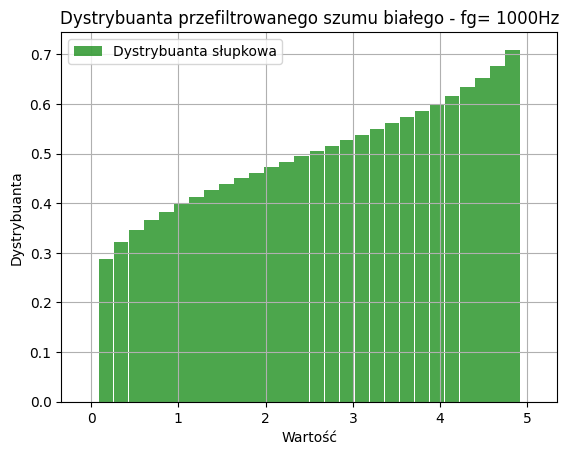

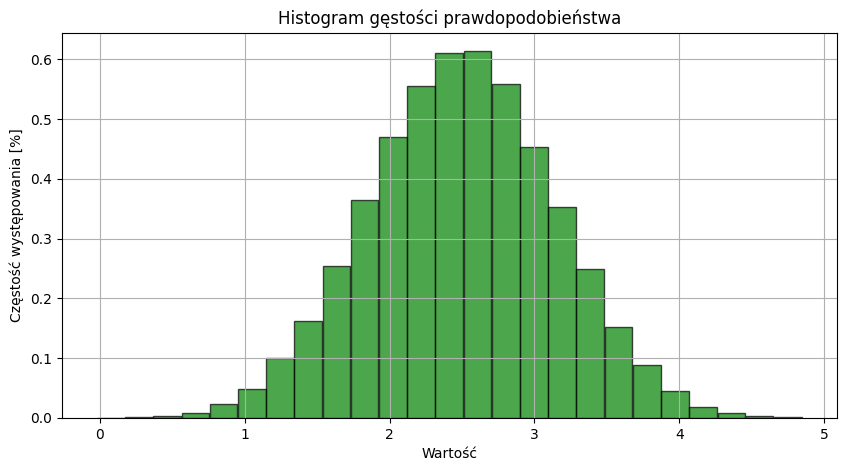

__________________________________________________________________________________________________________________
[0.02, 0.05, 0.1]
[array([2.55498046, 2.51344473, 2.46754177, ..., 2.25593814, 2.27199602,
       2.30465302]), array([2.79653611, 2.73655517, 2.65705633, ..., 1.82242855, 1.84486387,
       1.8928069 ]), array([2.39438435, 2.23583055, 2.08213595, ..., 3.62086326, 3.39362239,
       3.06828259])]
Tabela dla filtru o częstotliwości granicznej 200 Hz:
   Liczba próbek  Estymator wartości  Estymator wariancji  \
0            100            2.538022             0.040936   
1            500            2.410033             0.073898   
2           1000            2.470124             0.090278   
3           5000            2.512285             0.105403   
4          10000            2.499082             0.106323   
5          50000            2.503106             0.101321   

   Estymator kowariancji  
0               0.040844  
1               0.073226  
2               0.089623

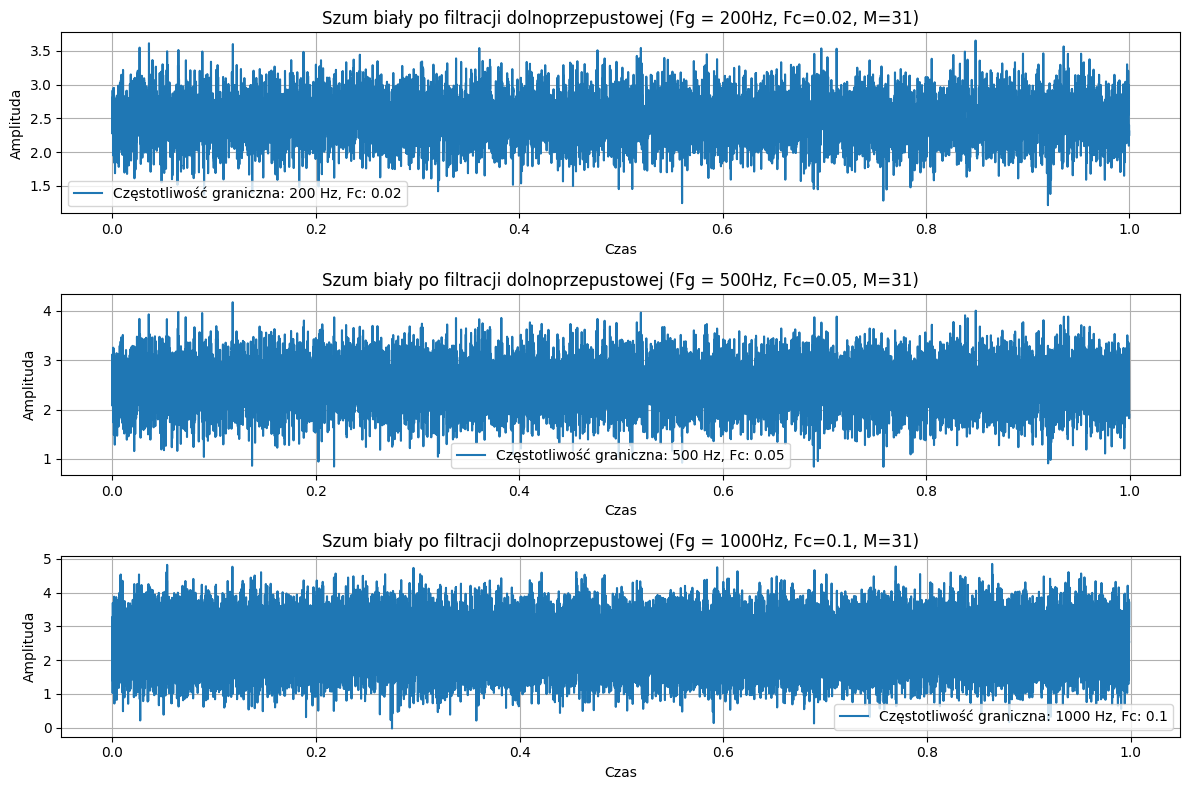

In [15]:
from scipy.signal import firwin, convolve

# Lista wartości częstotliwości granicznej
cutoff_frequencies = [200, 500, 1000]  # Hz

# Parametry filtru
sampling_frequency = 10000  # Hz
filtered_noises = []
fc_s=[]

for cutoff in cutoff_frequencies:
    # Obliczenie długości okna filtru proporcjonalnie do częstotliwości granicznej
    window_length = int(31 * (cutoff / 200))

    # Generowanie odpowiedzi impulsowej filtru FIR
    fir_coefficients = firwin(window_length, cutoff, fs=sampling_frequency)

    # Filtracja dolnoprzepustowa szumu białego
    filtered_noise = convolve(szum_bialy, fir_coefficients, mode='valid')

    # Dodanie wyniku do listy
    filtered_noises.append(filtered_noise)

    expected_value = sum(filtered_noise) / len(filtered_noise)
    variance = sum((x - expected_value) ** 2 for x in filtered_noise) / len(filtered_noise)
    fc = cutoff/CZESTOTLIWOSC_PROBKOWANIA
    fc_s.append(fc)
    print("M:", 31)
    print("Fg:", cutoff, "Hz")
    print("Fc:", fc)
    print("Wartość oczekiwana:", expected_value)
    print("Wariancja:", variance)
    dystrybuanta_slupkowa(filtered_noise, ZAKRES, 30, fg=str(cutoff))
    wykres_gestosci_prawdopodobienstwa(filtered_noise)
    print("__________________________________________________________________________________________________________________")

print(fc_s)
# Wykres przed i po filtracji dla różnych wartości częstotliwości granicznej
plt.figure(figsize=(12, 8))

for i, cutoff in enumerate(cutoff_frequencies):
    plt.subplot(len(cutoff_frequencies), 1, i+1)
    plt.plot(CZAS_TRWANIA[:len(filtered_noises[i])], filtered_noises[i], label=f'Częstotliwość graniczna: {str(cutoff_frequencies[i])} Hz, Fc: {str(fc_s[i])}')
    plt.xlabel('Czas')
    plt.ylabel('Amplituda')
    plt.title(f'Szum biały po filtracji dolnoprzepustowej (Fg = {str(cutoff_frequencies[i])}Hz, Fc={str(fc_s[i])}, M=31)')
    plt.grid(True)
    plt.legend()

    tabela_statystyczna = []

    print(filtered_noises)
    z_dashes = []

    for j,k in enumerate(K[0:-1]):  # Dla różnych liczby próbek
        # Obliczanie estymatorów
        m_dash = sum(filtered_noises[i][:k]) / k
        a_dash = sum((x - m_dash) ** 2 for x in filtered_noises[i][:k]) / k

        # if i < len(cutoff_frequencies) - 1:
        z_dash = sum((filtered_noises[i][j] - m_dash) * (filtered_noises[i][j+1] - m_dash) for j in range(k)) / k
        # else:
        #     z_dash = None

        tabela_statystyczna.append([k, m_dash, a_dash, z_dash])
        z_dashes.append(z_dash)

    # Tworzenie ramki danych dla danego filtru
    df_statystyka = pd.DataFrame(tabela_statystyczna, columns=['Liczba próbek', 'Estymator wartości', 'Estymator wariancji', 'Estymator kowariancji'])

    # Wyświetlenie ramki danych dla danego filtru
    print(f'Tabela dla filtru o częstotliwości granicznej {cutoff} Hz:')
    print(df_statystyka)
    print('\n')

    # Dodanie wykresu z_dash od k do ramki danych
    # print(z_dashes,K[0:-1])
    # plt.plot(K[0:-1], z_dashes)
    # plt.xlabel('Liczba próbek')
    # plt.ylabel('Wartość x')
    # plt.title('Wykres x od liczby próbek')
    # plt.show()

plt.tight_layout()
plt.show()

[-0.2833919239403623, -0.05013505846371983, 0.11181277701292261, -0.15084480751043494, -0.11722072203379251, 0.12513250344284993, 0.02702170491949237, -0.2028239856038652, -0.08067275512722274, 0.003793528049419695, -0.13395144917393786, 0.17288852630270457, 0.38649074177934706, 0.042615586255989456, 0.0546358007326319, 0.11116323820927435, -0.07937315031408322, 0.047326266162559215, 0.22876632463920166, 0.1709394301158441, -0.08587049340751346, -0.00010472943087101987, 0.11831049654577143, -0.34771587797758613, -0.6610532225009438, -0.19145324702430128, 0.2906542284523412, 0.10856446392898363, 0.024747953405626064, 0.0517122008822685, 0.027022076358910945, 0.17808676583555338, 0.020849572312195825, -0.27884322321116173, -0.00010452823451929331, 0.45731280774212313, 0.3720343832187656, 0.15745759869540804, 0.0024944957720504698, -0.07027642735130708, 0.026210056125335352, -0.11364657939802221, -0.22930037392137978, -0.09772790144473732, -0.030967047968094887, -0.059880485491452445, 0.0

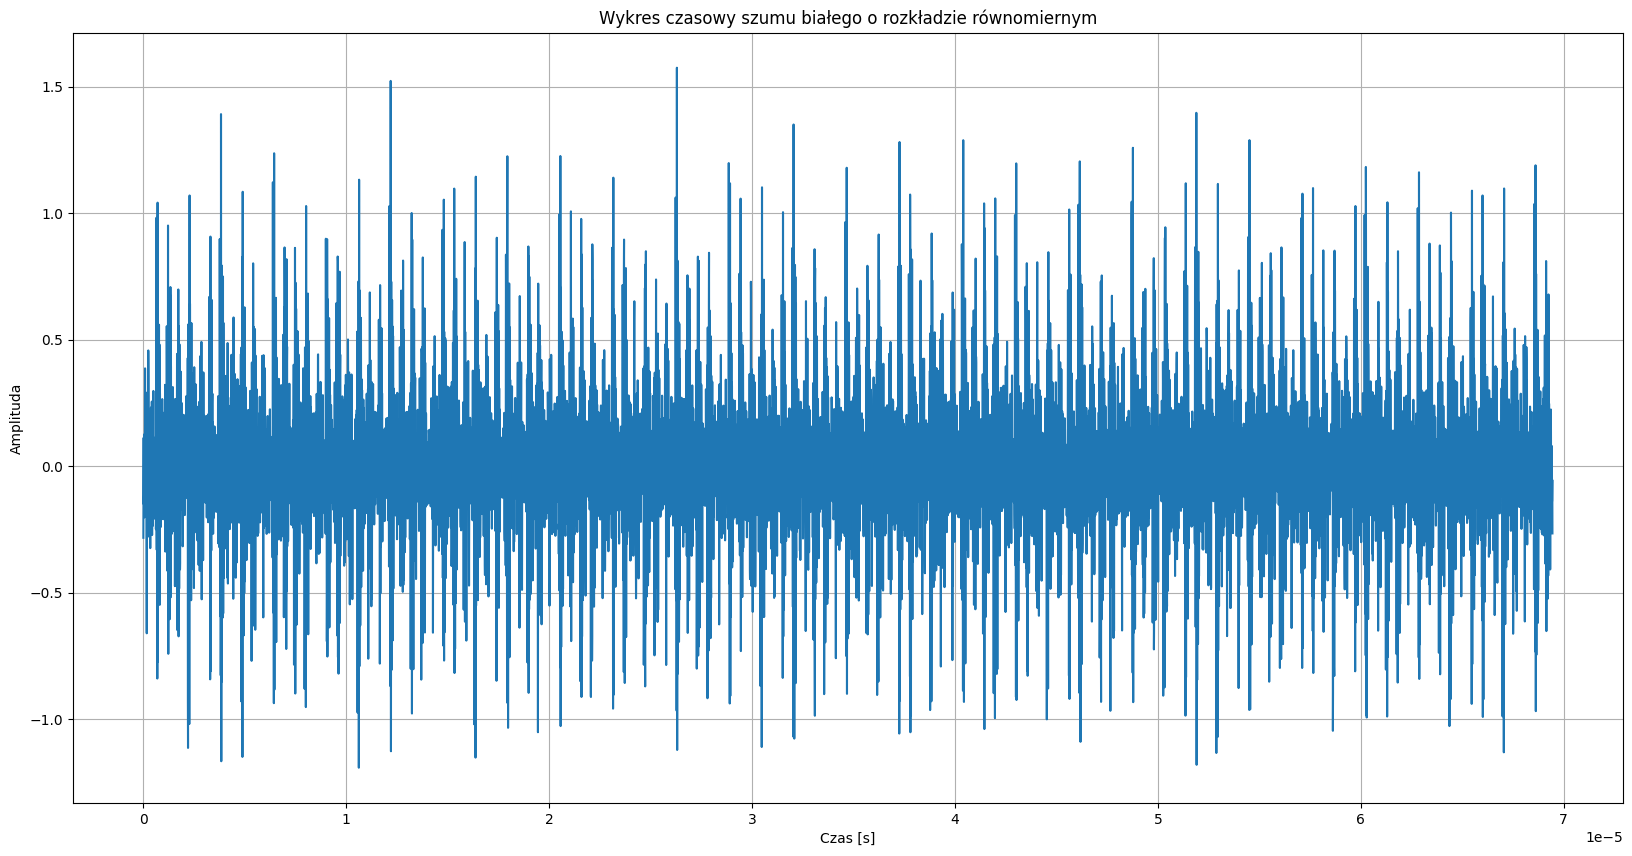

Liczba próbek 100
Czas próbkowania 6.944444444444445e-07
Częstotliwość próbkowania 12000



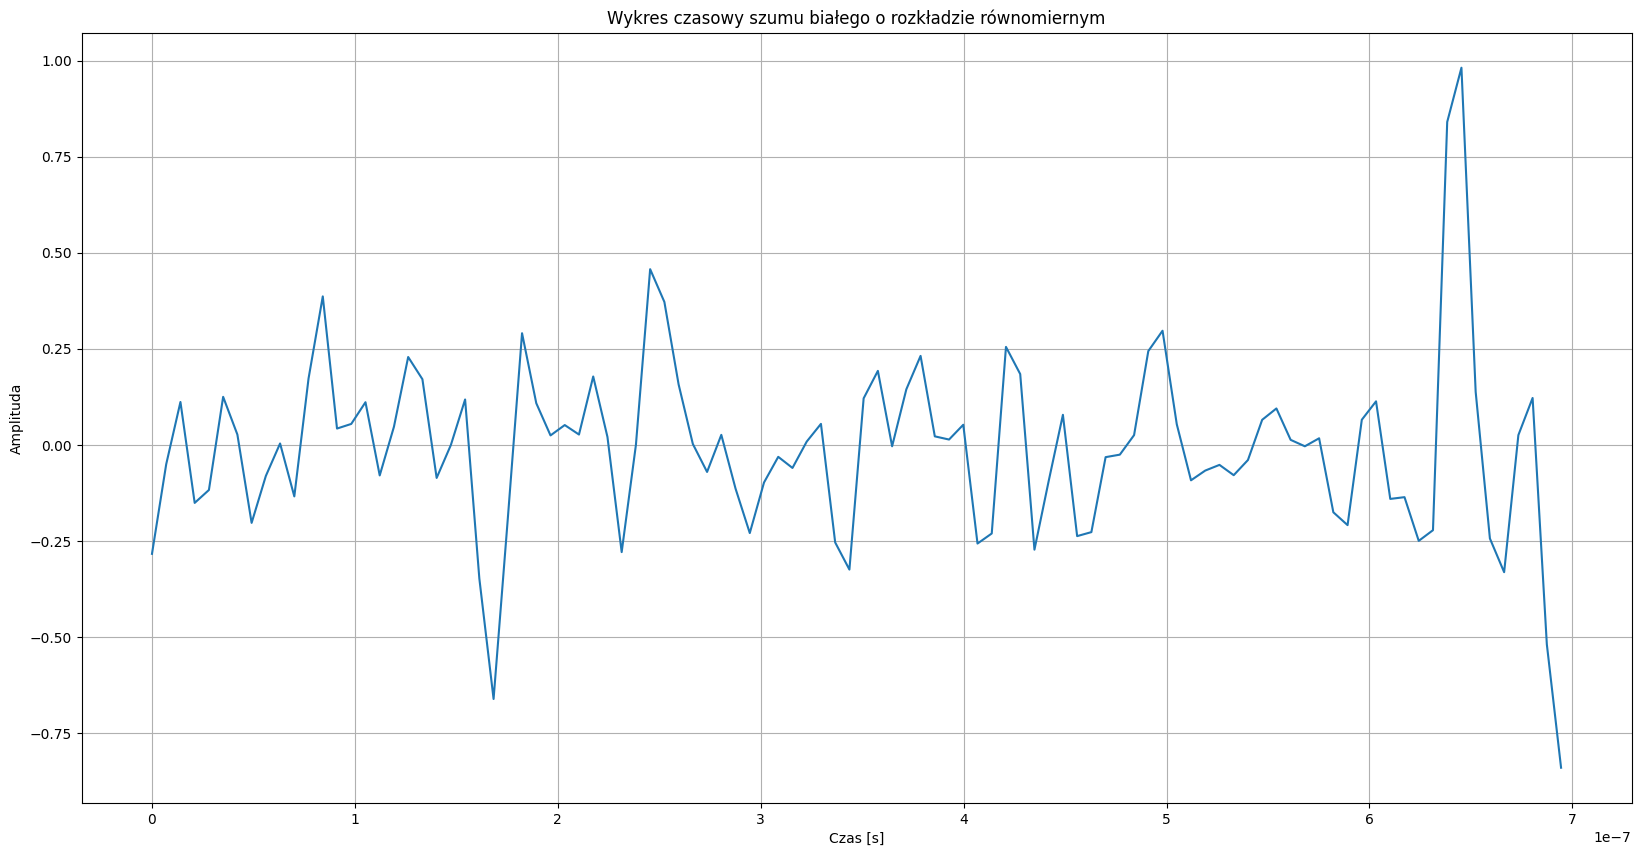

Wartośc oczekiwana: 5.018208071305707e-18
   Liczba próbek  Estymator wartości  Estymator wariancji  \
0            500           -0.000333             0.080502   
1           1000           -0.000217             0.084658   
2           2000           -0.000251             0.087048   
3           5000           -0.000115             0.085923   
4           9999            0.000027             0.086013   

   Estymator kowariancji  
0               0.008617  
1               0.008681  
2               0.008408  
3               0.008578  
4               0.008056  




In [16]:
with open('106_rawSignal_10000.txt', 'r') as file:
    lines = file.readlines()

numbers = [float(line.strip()) for line in lines]
print(numbers)

LICZBA_PROBEK = 10000
CZAS_TRWANIA = 1/1.2  # sekundy
CZESTOTLIWOSC_PROBKOWANIA = 12000  # Hz
CZAS_PROBKOWANIA = CZAS_TRWANIA/CZESTOTLIWOSC_PROBKOWANIA

print(f"Liczba próbek {LICZBA_PROBEK}")
print(f"Czas próbkowania {CZAS_PROBKOWANIA}")
print(f"Częstotliwość próbkowania {CZESTOTLIWOSC_PROBKOWANIA}")
print("")

wykres_czasowy_szumu_bialego(numbers, CZAS_PROBKOWANIA, LICZBA_PROBEK)

liczba_do_wykresu = int(LICZBA_PROBEK/100)
czas_do_wykresu = int(CZAS_TRWANIA/100)
CZAS_PROBKOWANIA_do_wykresu = CZAS_PROBKOWANIA/100
print(f"Liczba próbek {liczba_do_wykresu}")
print(f"Czas próbkowania {CZAS_PROBKOWANIA_do_wykresu}")
print(f"Częstotliwość próbkowania {CZESTOTLIWOSC_PROBKOWANIA}")
print("")

wykres_czasowy_szumu_bialego(numbers[0:liczba_do_wykresu], CZAS_PROBKOWANIA_do_wykresu, liczba_do_wykresu)

print(f"Wartośc oczekiwana: {sum(numbers)/len(numbers)}")

tabela_statystyczna = []
K = [500,1000,2000,5000,9999] #rozmiary próbek

for k in K:  # Dla różnych liczby próbek
    # Obliczanie estymatorów
    m_dash = sum(numbers[:k]) / k
    a_dash = sum((x - m_dash) ** 2 for x in numbers[:k]) / k

    # if i < len(cutoff_frequencies) - 1:
    z_dash = sum((numbers[j] - m_dash) * (numbers[j+1] - m_dash) for j in range(k-1)) / k
        # else:
        #     z_dash = None

    tabela_statystyczna.append([k, m_dash, a_dash, z_dash])
    z_dashes.append(z_dash)

    # Tworzenie ramki danych dla danego filtru
df_statystyka = pd.DataFrame(tabela_statystyczna, columns=['Liczba próbek', 'Estymator wartości', 'Estymator wariancji', 'Estymator kowariancji'])

    # Wyświetlenie ramki danych dla danego filtru
print(df_statystyka)
print('\n')

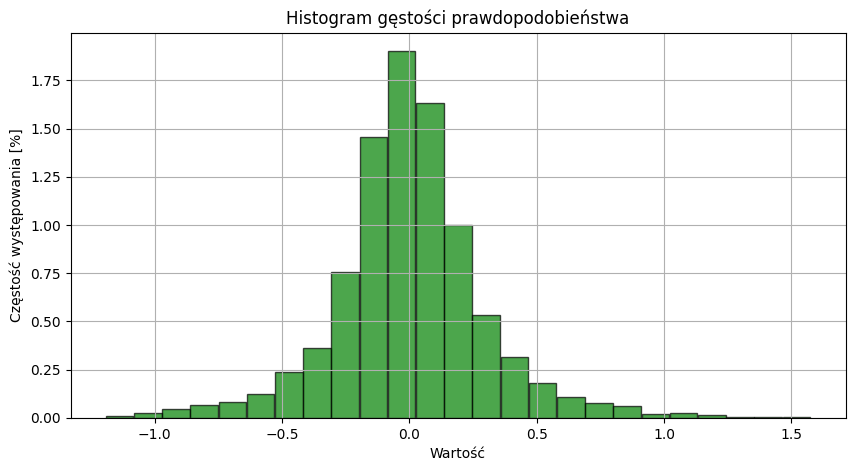

mean: 2.818874263341789e-05


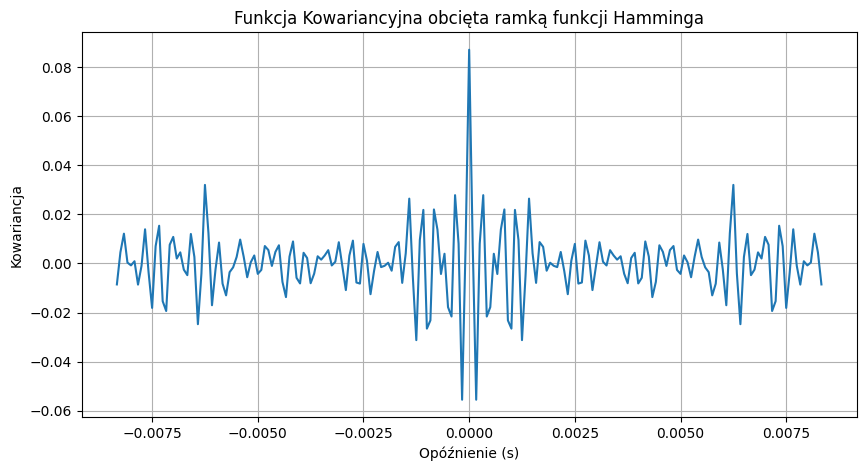

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate, spectrogram
import statistics

CZESTOTLIWOSC_PROBKOWANIA = 12000
ILOSC_PROBEK = 10000
CZAS_TRWANIA = ILOSC_PROBEK / CZESTOTLIWOSC_PROBKOWANIA

# # Obliczanie funkcji autokorelacji
# autokorelacja = correlate(numbers, numbers, mode='full')

# # Normalizacja funkcji autokorelacji (opcjonalnie)
# autokorelacja /= np.max(autokorelacja)

# # Tworzenie wykresu funkcji autokorelacji
# czas_autokorelacji = np.arange(-len(numbers)+1, len(numbers))
# plt.figure(figsize=(10, 5))
# plt.plot(czas_autokorelacji, autokorelacja)
# plt.title('Funkcja autokorelacji')
# plt.xlabel('Opóźnienie')
# plt.ylabel('Amplituda')
# plt.grid(True)
# plt.show()

wykres_gestosci_prawdopodobienstwa(numbers)

numtaps = 31
warmup = numtaps

K=10000
K_f = K - warmup
M = K_f - 100
data = []
filtered_numbers = numbers[warmup:]
filtered_mean = statistics.mean(filtered_numbers)
print(f"mean: {filtered_mean}")

for j in range(0, 101):
    cov = 0
    for i in range(0, K_f - j):
        covariance_product = (numbers[i + warmup] - filtered_mean) * (
            numbers[i + warmup + j] - filtered_mean
        )
        cov += covariance_product
    data.append(cov / M)

mantissa = int(str(K)[:2])
exponent = int(np.log10(K / 10))

# Creating symmetrical data
data_sym = data[::-1] + data[1:]
symmetry_axis = np.arange(-len(data)+1, len(data)) / CZESTOTLIWOSC_PROBKOWANIA

# Plot symmetric with respect to Y axis
plt.figure(figsize=(10, 5))
sns.lineplot(x=symmetry_axis, y=data_sym)
plt.title("Funkcja Kowariancyjna obcięta ramką funkcji Hamminga")
plt.xlabel("Opóźnienie (s)")
plt.ylabel("Kowariancja")
plt.grid(True)
plt.show()

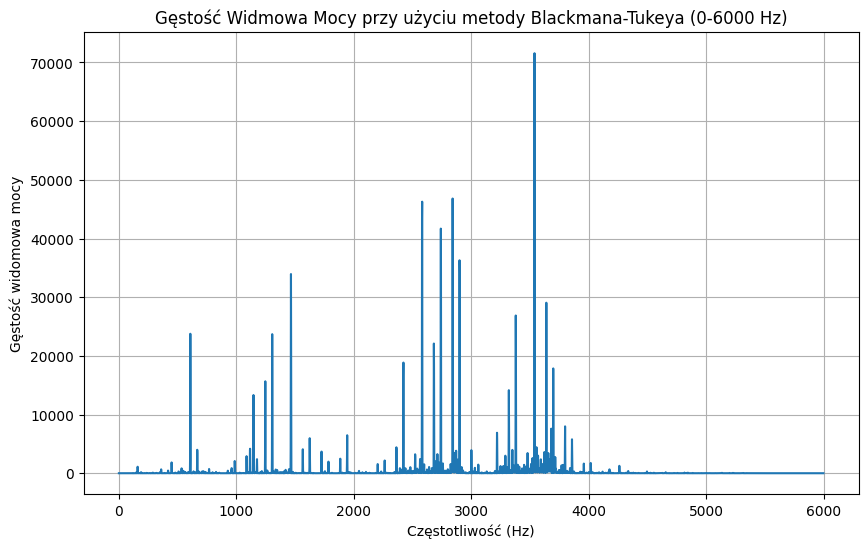

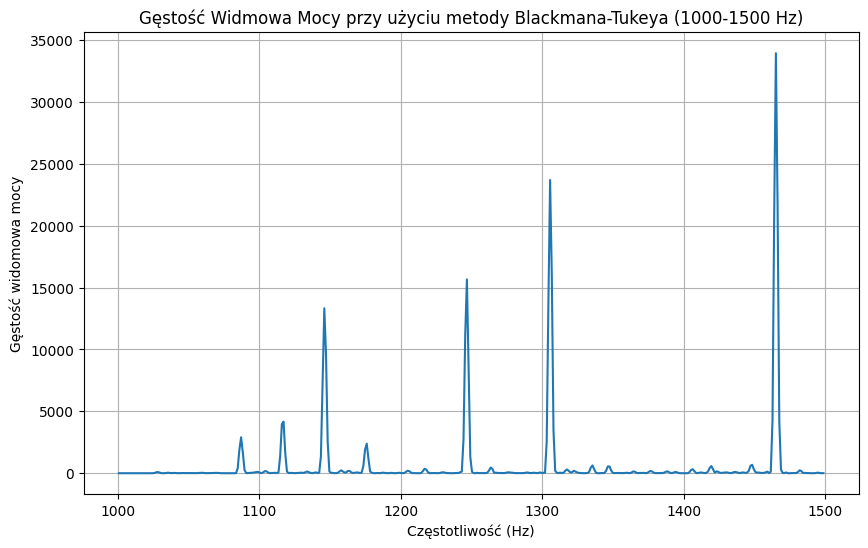

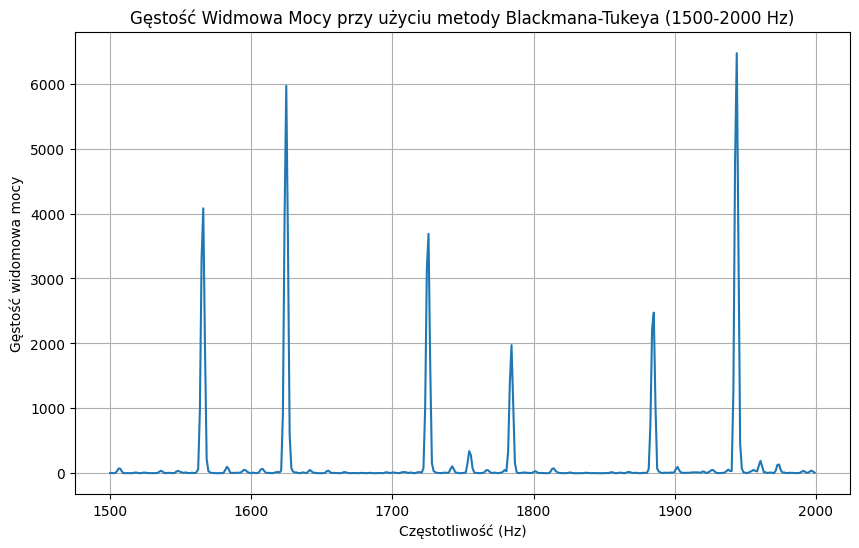

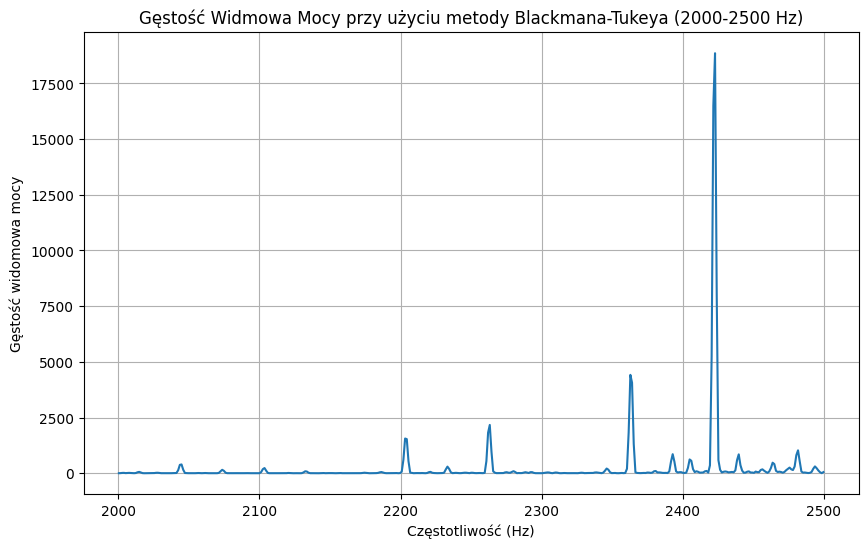

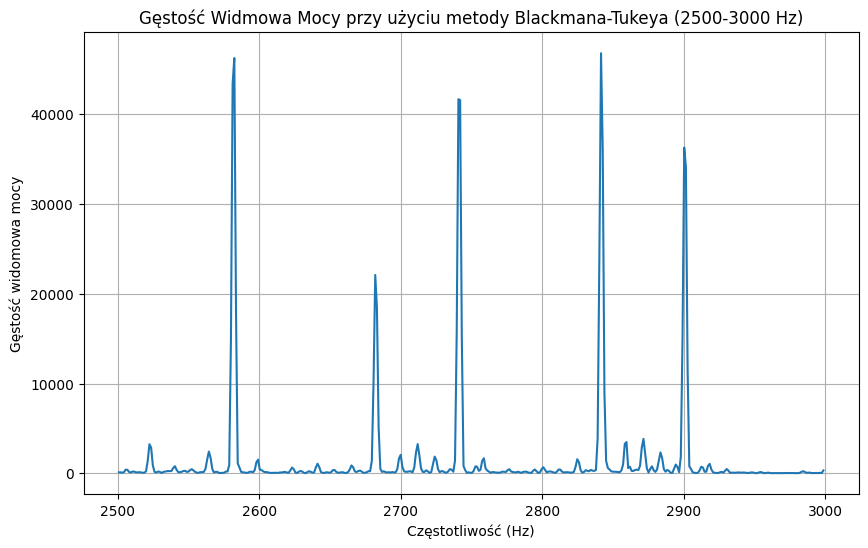

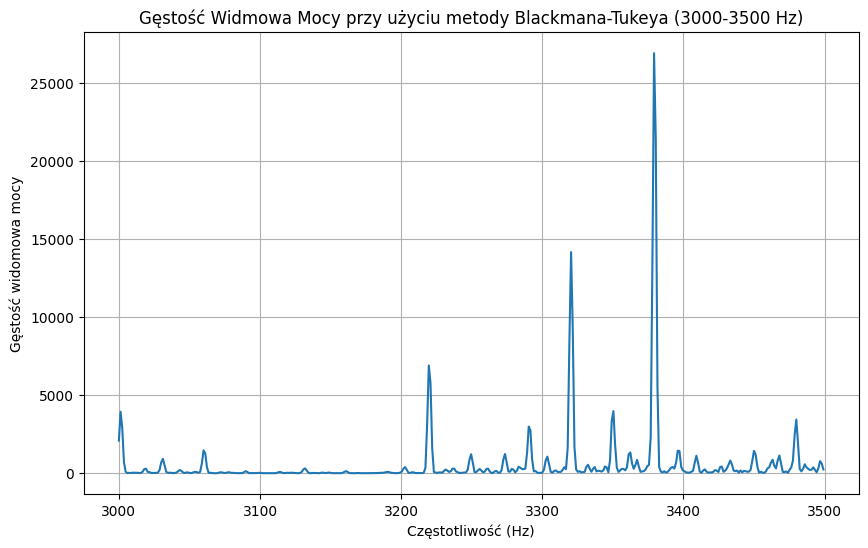

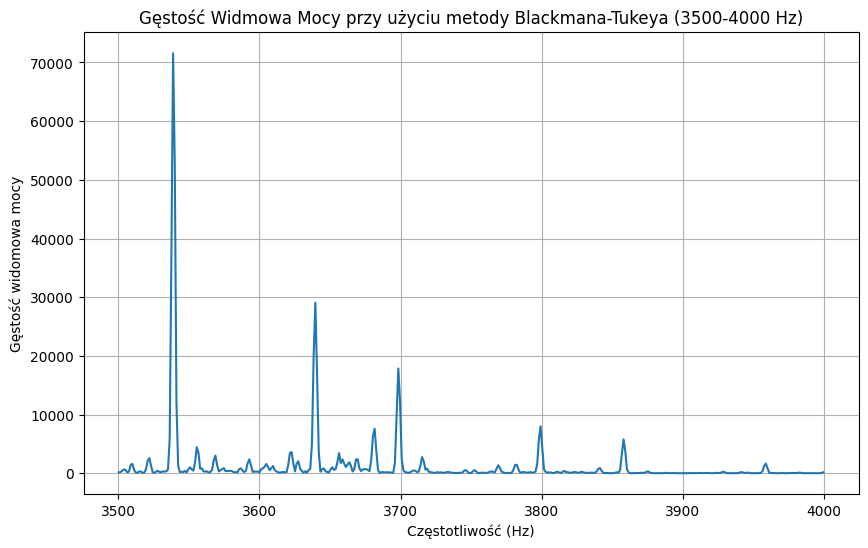

In [24]:
# Generate time axis (optional, for reference)
t = np.linspace(0, CZAS_TRWANIA, ILOSC_PROBEK, endpoint=False)

# Compute the autocorrelation of the signal
def autocorrelation(signal):
    result = np.correlate(signal, signal, mode='full')
    return result[result.size // 2:]

autocorr = autocorrelation(numbers)

# Apply a window function (Blackman window)
window = np.blackman(len(autocorr))
windowed_autocorr = autocorr * window

# Perform FFT to get the Power Spectral Density (PSD)
psd = np.fft.fft(windowed_autocorr, n=ILOSC_PROBEK)
psd = np.abs(psd)[:ILOSC_PROBEK // 2]

# Frequency axis
frequencies = np.fft.fftfreq(ILOSC_PROBEK, d=1/CZESTOTLIWOSC_PROBKOWANIA)[:ILOSC_PROBEK // 2]

# Function to plot PSD for given frequency range
def plot_psd(frequencies, psd, f_min, f_max):
    mask = (frequencies >= f_min) & (frequencies <= f_max)
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies[mask], psd[mask])
    plt.title(f'Gęstość Widmowa Mocy przy użyciu metody Blackmana-Tukeya ({f_min}-{f_max} Hz)')
    plt.xlabel('Częstotliwość (Hz)')
    plt.ylabel('Gęstość widomowa mocy')
    plt.grid()
    plt.show()

plot_psd(frequencies, psd, 0, 6000)
plot_psd(frequencies, psd, 1000, 1500)
plot_psd(frequencies, psd, 1500, 2000)
plot_psd(frequencies, psd, 2000, 2500)
plot_psd(frequencies, psd, 2500, 3000)
plot_psd(frequencies, psd, 3000, 3500)
plot_psd(frequencies, psd, 3500, 4000)